![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

### Import TensorFlow

In [1]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


# Task 2: The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Plot an Image Example

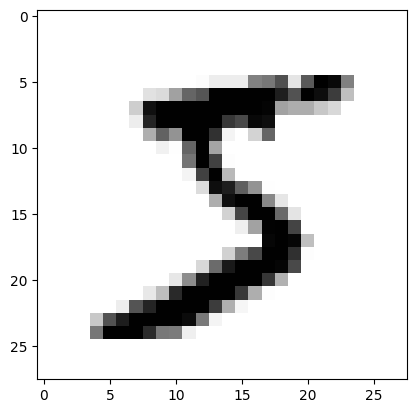

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

### Display Labels

In [5]:
y_train[0]

5

In [6]:
print(set(y_train))	

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [8]:
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(60000, 10)
(10000, 10)


### Display Encoded Labels

In [9]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Task 4: Neural Networks

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [10]:
import numpy as np

x_train_rehaped=np.reshape(x_train,(60000,784))
x_test_rehaped=np.reshape(x_test,(10000,784))

print(x_train_rehaped.shape)
print(x_test_rehaped.shape)

(60000, 784)
(10000, 784)


### Display Pixel Values

In [11]:
print(set(x_train_rehaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [12]:
x_mean=np.mean(x_train_rehaped)
x_std=np.std(x_train_rehaped)

epsilon=1e-10

x_train_norm = (x_train_rehaped-x_mean)/(x_std+epsilon)
x_test_norm = (x_test_rehaped-x_mean)/(x_std+epsilon)

### Display Normalized Pixel Values

In [13]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6: Creating a Model
### Creating the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model=Sequential([
   Dense(128,activation='relu',input_shape=(784,)),
   Dense(128,activation='relu'),
   Dense(10,activation='softmax')
])

c:\Users\rupin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the Model

In [15]:
model.compile(
   optimizer='sgd',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Task 7: Training the Model

### Training the Model

In [16]:
#model already run on 3 epochs
model.fit(x_train_norm,y_train_encoded,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8174 - loss: 0.6193
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9452 - loss: 0.1888
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9603 - loss: 0.1360
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9684 - loss: 0.1116
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9731 - loss: 0.0935


### Evaluating the Model

In [17]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:',accuracy*100)
print('Test set loss:',loss*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9609 - loss: 0.1219
Test set accuracy: 96.670001745224
Test set loss: 10.604356974363327


# Task 8: Predictions

### Predictions on Test Set

In [18]:
preds=model.predict(x_test_norm)
print(preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


### Plotting the Results

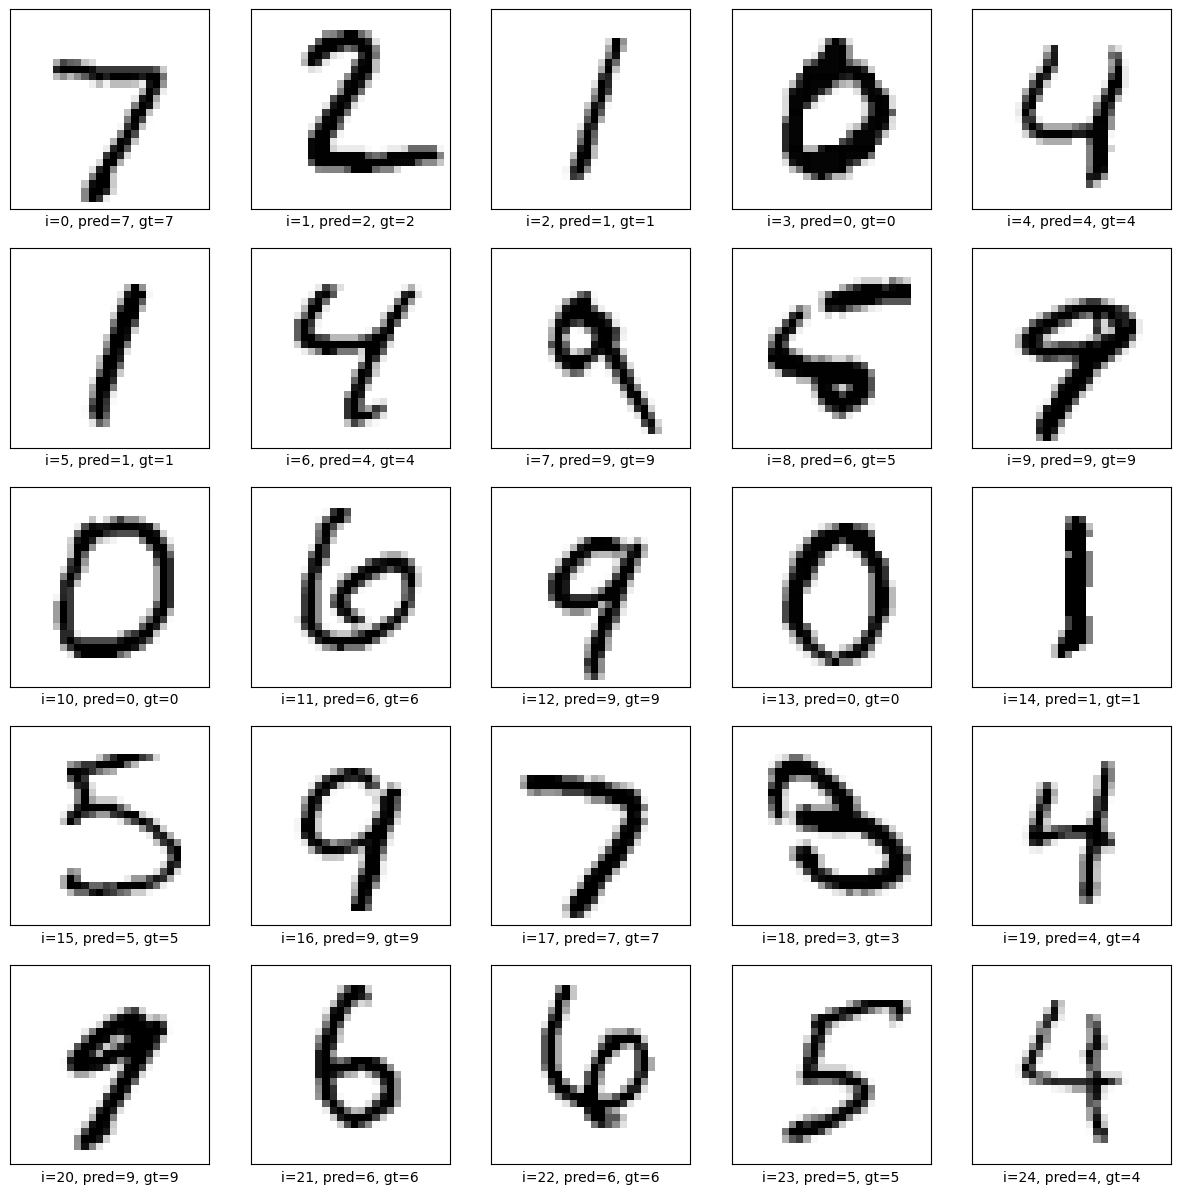

In [19]:
plt.figure(figsize=(15,15))

start_index=0

for i in range(25):
	plt.subplot(5, 5, i + 1)
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	
	pred = np.argmax(preds[start_index + i])
	gt = y_test[start_index + i]
	
	col = 'g'
	if pred != gt:
		col = 'r'
	
	plt.xlabel('i={}, pred={}, gt={}'.format(start_index + i, pred, gt))
	plt.imshow(x_test[start_index + i], cmap='binary')

plt.show()

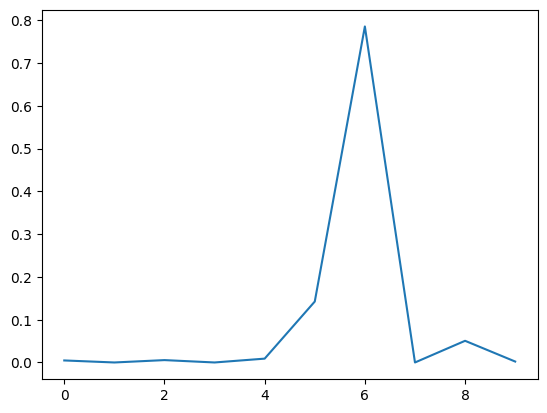

In [20]:
plt.plot(preds[8])
plt.show()